https://github.com/NikitaChizhov/deep_kalman_filter_for_BM/blob/master/Healing%20MNIST.ipynb

In [1]:
#  ! pip install mnist

In [2]:
import healing_mnist

In [3]:
seq_len = 50
hmnist = healing_mnist.HealingMNIST(seq_len=seq_len, square_count=0, square_size=5, noise_ratio=0.0, digits=range(10))

In [4]:
hmnist.train_images.shape

(60000, 50, 28, 28)

In [5]:
hmnist.train_rotations.shape

(60000, 50)

In [6]:
hmnist.test_images.shape

(10000, 50, 28, 28)

In [7]:
hmnist.test_rotations.shape

(10000, 50)

In [8]:
'''
hmnist = healing_mnist.HealingMNIST(seq_len=5, # 5 rotations of each digit
                                    square_count=3, # 3 out of 5 images have a square added to them
                                    square_size=5, # the square is 5x5
                                    noise_ratio=0.15, # on average, 20% of the image is eaten by noise,
                                    digits=range(10) # only include this digits
                                    )
'''

'\nhmnist = healing_mnist.HealingMNIST(seq_len=5, # 5 rotations of each digit\n                                    square_count=3, # 3 out of 5 images have a square added to them\n                                    square_size=5, # the square is 5x5\n                                    noise_ratio=0.15, # on average, 20% of the image is eaten by noise,\n                                    digits=range(10) # only include this digits\n                                    )\n'

In [9]:
# hmnist2 = he

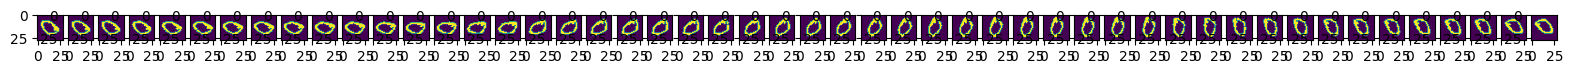

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure(figsize=(20,12))
for i, image in enumerate(hmnist.train_images[1]):
    fig.add_subplot(1, seq_len+1, i+1)
    plt.imshow(image)

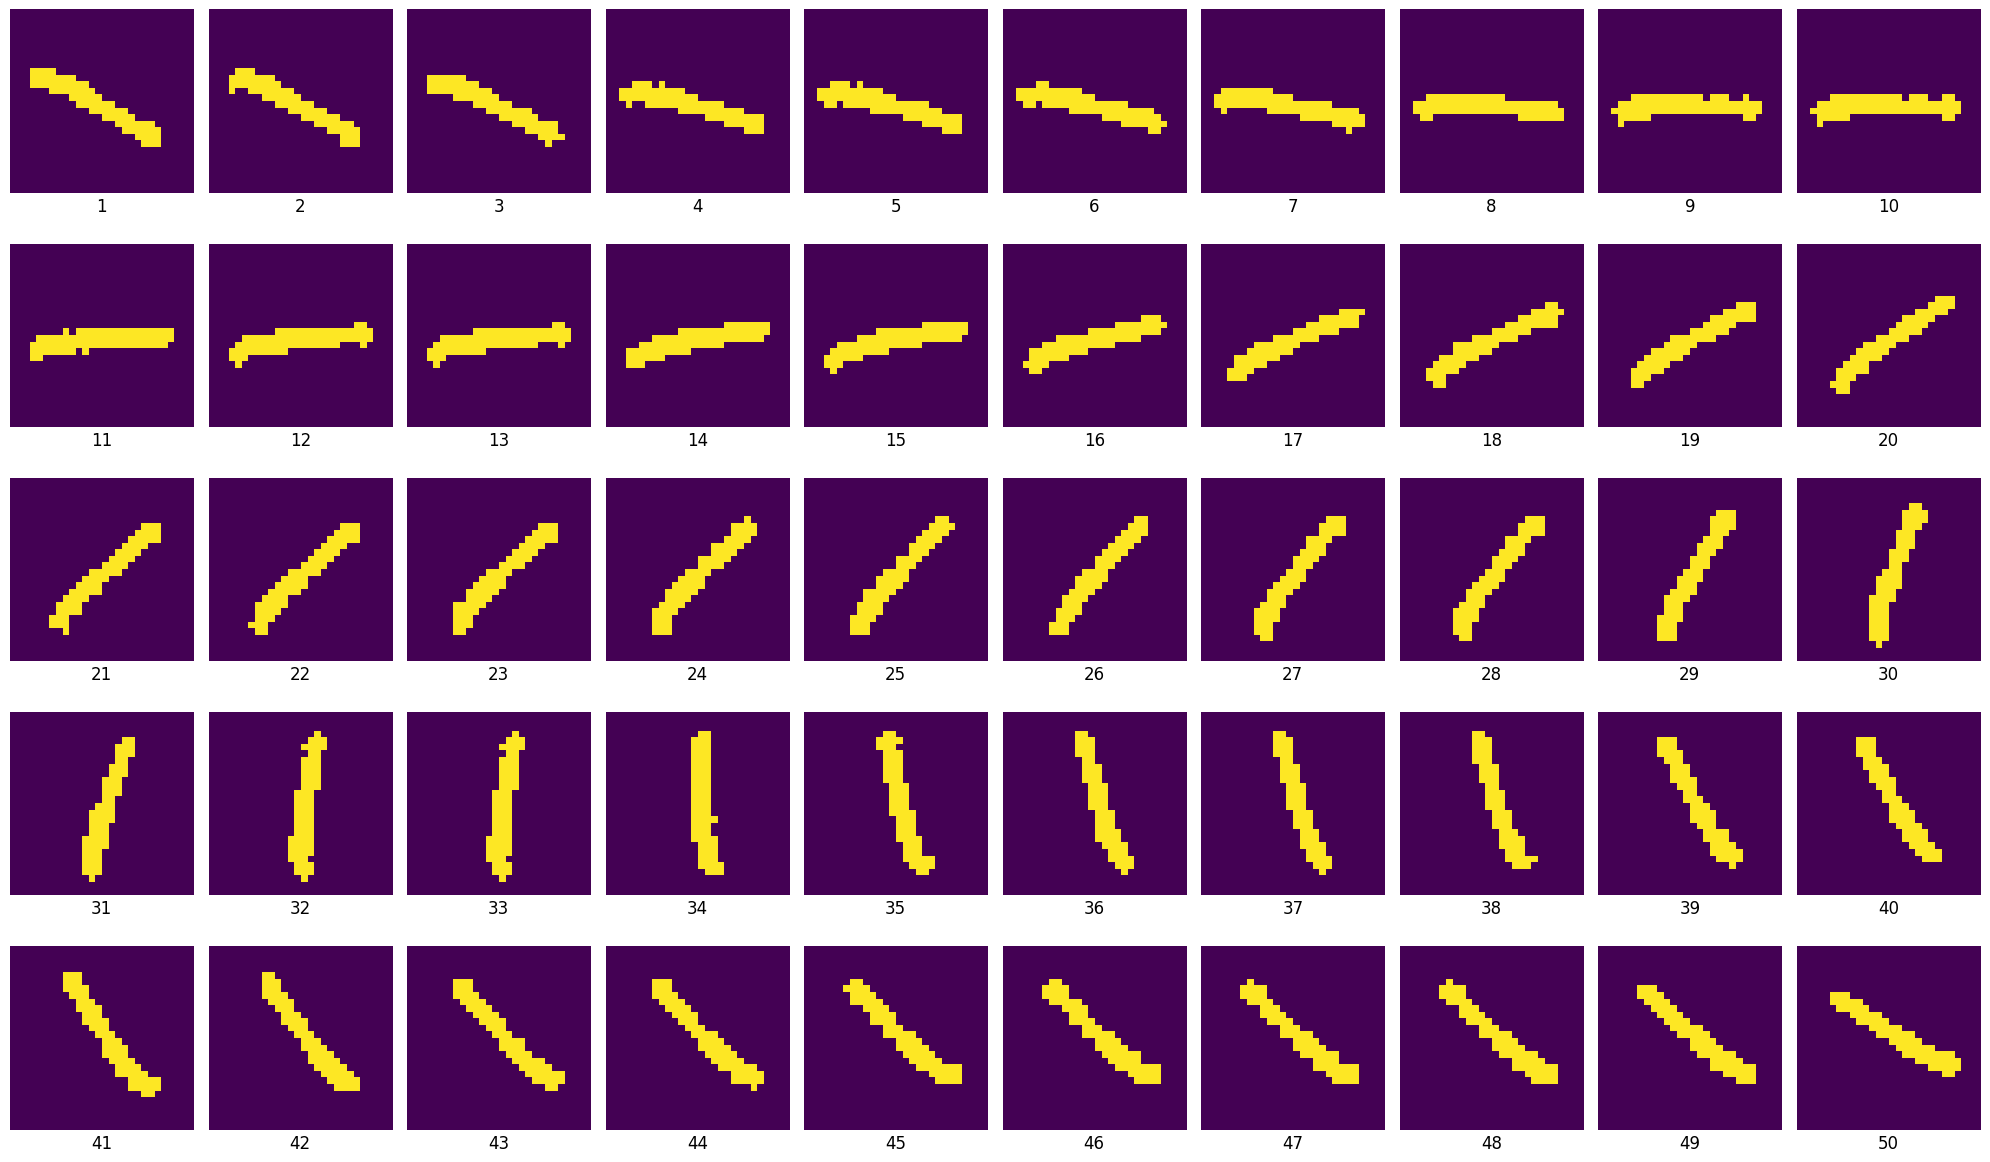

In [11]:
import math
num_images = len(hmnist.train_images[1])
images_per_row = 10

num_rows = math.ceil(num_images / images_per_row)

fig = plt.figure(figsize=(20, 12))

for i, image in enumerate(hmnist.train_images[3]):
    row = i // images_per_row
    col = i % images_per_row

    ax = fig.add_subplot(num_rows, images_per_row, i + 1)
    ax.imshow(image)
    ax.axis('off') 

    ax.text(0.5, -0.1, f"{i+1}", size=12, ha="center", transform=ax.transAxes)

plt.tight_layout() 
plt.show()

In [12]:
for rotation in hmnist.train_rotations[3]:
    print(rotation)

-88.66270788861002
-86.82393294711649
-84.94654891409832
-74.4740739974772
-73.84732639937019
-72.96912517597775
-70.11612762817207
-62.322015835512154
-59.22321071924725
-58.639739585591855
-54.35277933269623
-52.39496010048563
-52.265351292809775
-48.382607757411314
-47.87072564806793
-43.66928447039707
-34.51469610288343
-33.242591220102106
-29.125209629511225
-23.573266802870876
-17.333002435777388
-15.681706040232456
-14.834779253109659
-12.890799241704514
-10.559032210769217
-9.23726504921872
-5.660828058263704
-5.480166598374765
2.127316558329909
11.33854331696341
13.40048716951219
23.49649085723445
23.648259317803436
33.757907499932784
44.59456557014906
47.0292285626243
48.04350100256602
49.206061572828105
59.592134489719825
60.88985648349109
65.4350938880057
67.8087295188667
73.32734722471002
74.82541941568462
76.9216920290057
77.785649927224
78.329374213904
78.38132412856777
79.84342612159963
87.81474956820998


In [13]:
# print(hmnist.train_images[1][0])

In [14]:
import numpy as np

In [15]:
root_path = f'/Users/jiangxiaoyu/Desktop/All Projects/GPLVM_project_code/healing_mnist_data/len={seq_len}_squ=0_noise=0_digit=all'

import os
os.makedirs(root_path, exist_ok=True)
np.save(f'{root_path}/train.npy', hmnist.train_images)
np.save(f'{root_path}/train_rotations.npy', hmnist.train_rotations)
np.save(f'{root_path}/test.npy', hmnist.test_images)
np.save(f'{root_path}/test_rotations.npy', hmnist.test_rotations)
